In [3]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

##Removing images which are not of required file types.

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'test-images'

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
!pip install opendatasets

In [14]:
!git clone https://github.com/PyKnight-vedant/Ip_Internship


Cloning into 'Ip_Internship'...
remote: Enumerating objects: 2158, done.
remote: Total 2158 (delta 0), reused 0 (delta 0), pack-reused 2158
Receiving objects: 100% (2158/2158), 79.94 MiB | 43.38 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [12]:
import opendatasets as od
od.download("https://github.com/PyKnight-vedant/Ip_Internship/tree/master/test-images")

139264it [00:00, 448587.08it/s]


In [98]:
%cd Ip_Internship

[Errno 2] No such file or directory: 'Ip_Internship'
/content/Ip_Internship


In [99]:
data = tf.keras.utils.image_dataset_from_directory('test-images')

Found 2140 files belonging to 2 classes.


In [100]:
data_iterator = data.as_numpy_iterator()

In [101]:
batch = data_iterator.next()

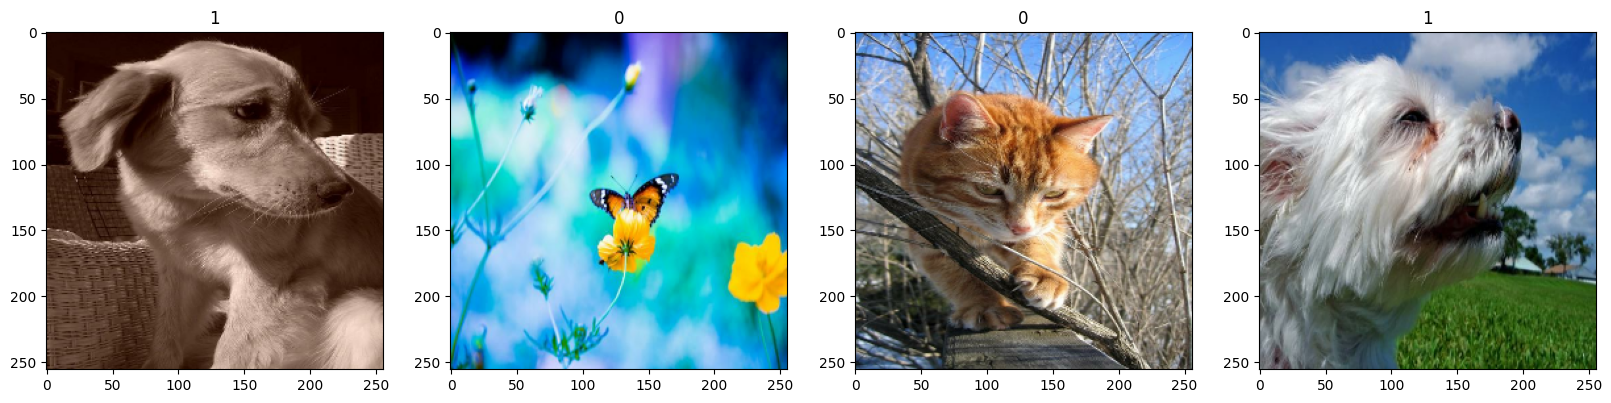

In [102]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

##IMAGE SCALING

In [103]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.20943627, 0.27610293, 0.2447304 ],
          [0.21723345, 0.2839001 , 0.25252756],
          [0.21796875, 0.28463542, 0.25326288],
          ...,
          [0.10218374, 0.07081119, 0.02767394],
          [0.0962163 , 0.05700061, 0.00994179],
          [0.10394778, 0.06473209, 0.01767327]],
 
         [[0.24891238, 0.3238358 , 0.29906556],
          [0.24472429, 0.31840688, 0.29405028],
          [0.24958125, 0.3162479 , 0.2918913 ],
          ...,
          [0.10138885, 0.0700163 , 0.02687904],
          [0.11162684, 0.07241115, 0.02535233],
          [0.11928615, 0.08007047, 0.03301164]],
 
         [[0.28302696, 0.3653799 , 0.34577206],
          [0.2739788 , 0.3484886 , 0.33280233],
          [0.26597732, 0.34048712, 0.32480085],
          ...,
          [0.10856658, 0.07719404, 0.03405678],
          [0.11019706, 0.07098138, 0.02392255],
          [0.11408632, 0.07487063, 0.02781181]],
 
         ...,
 
         [[0.45235908, 0.5111826 , 0.59353554],
          [0.44704

##DATA SPLITTING

In [104]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [105]:
train_size

46

In [106]:
val_size

13

In [107]:
test_size

6

In [108]:
len(data)

67

In [109]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [110]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [111]:
val

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [112]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

##Building Deep Learning Model

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [114]:
model = Sequential()

In [115]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [116]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 30, 30, 16)      

##Training the model

In [118]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [119]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
46/46 [==============================] - 7s 121ms/step - loss: 0.7261 - accuracy: 0.5041 - val_loss: 0.8079 - val_accuracy: 0.4543
Epoch 2/20
46/46 [==============================] - 7s 150ms/step - loss: 0.6714 - accuracy: 0.6182 - val_loss: 0.6678 - val_accuracy: 0.6226
Epoch 3/20
46/46 [==============================] - 6s 124ms/step - loss: 0.6112 - accuracy: 0.6692 - val_loss: 0.6552 - val_accuracy: 0.6659
Epoch 4/20
46/46 [==============================] - 7s 150ms/step - loss: 0.5025 - accuracy: 0.7514 - val_loss: 0.6582 - val_accuracy: 0.6418
Epoch 5/20
46/46 [==============================] - 6s 124ms/step - loss: 0.4358 - accuracy: 0.7928 - val_loss: 0.5933 - val_accuracy: 0.7091
Epoch 6/20
46/46 [==============================] - 6s 124ms/step - loss: 0.3170 - accuracy: 0.8709 - val_loss: 0.6659 - val_accuracy: 0.7236
Epoch 7/20
46/46 [==============================] - 7s 153ms/step - loss: 0.2626 - accuracy: 0.9062 - val_loss: 0.7766 - val_accuracy: 0.7356
Epoch 

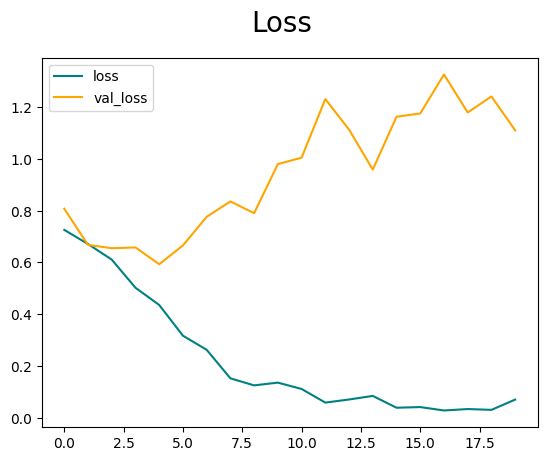

In [120]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

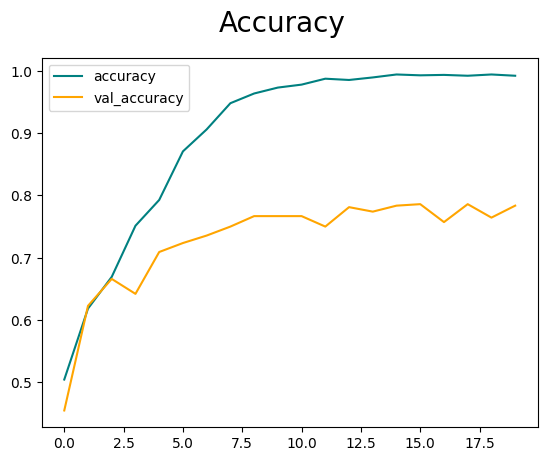

In [121]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

##Evaluate


In [122]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [123]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [124]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 28ms/step
tf.Tensor(0.5952381, shape=(), dtype=float32) tf.Tensor(0.5952381, shape=(), dtype=float32) tf.Tensor(0.6458333, shape=(), dtype=float32)


##TEST

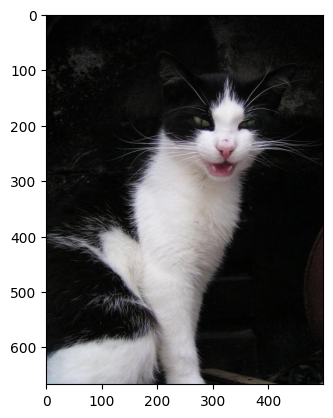

In [138]:
import cv2


# Load the image in BGR format
img = cv2.imread('/content/Ip_Internship/test-images/cats/cats_10_10.jpeg')

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the RGB image
plt.imshow(img_rgb)
plt.show()


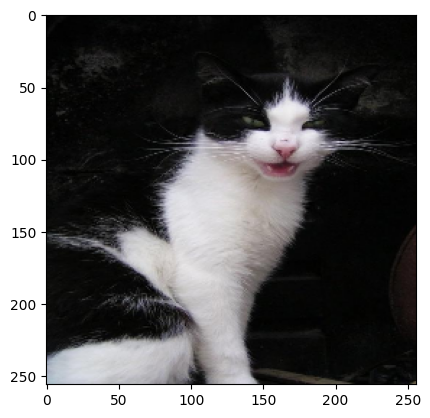

In [139]:
resize = tf.image.resize(img_rgb, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [140]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [141]:
yhat


array([[1.6129117e-05]], dtype=float32)

In [142]:
if yhat > 0.5:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat


##Save the Model

In [143]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


OSError: ignored

In [144]:
%cd models

/content/Ip_Internship/models


In [145]:
new_model = load_model('imageclassifier.h5')

In [146]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 17ms/step


In [147]:
yhat

array([[1.6129117e-05]], dtype=float32)